In [1]:
pip install prophet



SyntaxError: invalid syntax (3946680230.py, line 1)

In [2]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/13.3 MB 13.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.9/13.3 MB 11.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/13.3 MB 9.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/13.3 MB 10.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/13.3 MB 10.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/13.3 MB 10.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.3/13.3 MB 10.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.8/13.3 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 4.3/13.3 MB 10.1 MB/s eta 0:00:01

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Toni\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Toni\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\pyth

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('woechentlichxy_attendance.csv')  # Replace with actual CSV file

# Prepare the data for Prophet
# Prophet expects columns named 'ds' for the date/time and 'y' for the target variable (attendance)
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()
df_prophet.rename(columns={'week': 'ds', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'prophet'

In [5]:
pip install prophet


  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached holidays-0.57-py3-none-any.whl.metadata (26 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
Using cached holidays-0.57-py3-none-any.whl (1.1 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Toni\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('woechentlichxy_attendance.csv')  # Replace with actual CSV file

# Prepare the data for Prophet
# Prophet expects columns named 'ds' for the date/time and 'y' for the target variable (attendance)
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()
df_prophet.rename(columns={'week': 'ds', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


Importing plotly failed. Interactive plots will not work.


FileNotFoundError: [Errno 2] No such file or directory: 'woechentlichxy_attendance.csv'

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance = pd.read_csv('durchschnittliche_attendance.csv')  # Replace with actual CSV file

# Prepare the data for Prophet
# Prophet expects columns named 'ds' for the date/time and 'y' for the target variable (attendance)
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()
df_prophet.rename(columns={'week': 'ds', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


NameError: name 'df_attendance_weekly' is not defined

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('module_attendance_per_day_week.csv')  # Replace with actual CSV file

# Prepare the data for Prophet
# Prophet expects columns named 'ds' for the date/time and 'y' for the target variable (attendance)
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()
df_prophet.rename(columns={'week': 'ds', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('durchschnittliche_attendance.csv')  # Replace with actual CSV file

# Prepare the data for Prophet
# Prophet expects columns named 'ds' for the date/time and 'y' for the target variable (attendance)
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()
df_prophet.rename(columns={'week': 'ds', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


KeyError: 'week'

In [10]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('module_attendance_per_day_week.csv')  # Replace with actual CSV file

# Check the columns in the CSV
print(df_attendance_weekly.columns)

# Ensure there's a date column ('ds' or equivalent) and convert it to datetime
if 'ds' not in df_attendance_weekly.columns:
    raise KeyError("Date column ('ds') is missing. Ensure the date column exists and is named 'ds'.")

# Convert the date column to datetime (assuming it's named 'ds')
df_attendance_weekly['day'] = pd.to_datetime(df_attendance_weekly['day'])

# Extract the ISO week number if the 'week' column is not present
if 'week' not in df_attendance_weekly.columns:
    df_attendance_weekly['week'] = df_attendance_weekly['ds'].dt.isocalendar().week

# Prepare the data for Prophet
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()

# Rename the columns for Prophet (ds for dates, y for the target variable)
df_prophet.rename(columns={'week': 'day', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['day', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


Index(['module', 'day', 'week', 'attendance_count'], dtype='object')


KeyError: "Date column ('ds') is missing. Ensure the date column exists and is named 'ds'."

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('module_attendance_per_day_week.csv')  # Replace with actual CSV file

# Check the columns in the CSV
print(df_attendance_weekly.columns)

# Ensure there's a date column ('ds' or equivalent) and convert it to datetime
if 'day' not in df_attendance_weekly.columns:
    raise KeyError("Date column ('day') is missing. Ensure the date column exists and is named 'ds'.")

# Convert the date column to datetime (assuming it's named 'ds')
df_attendance_weekly['day'] = pd.to_datetime(df_attendance_weekly['day'])

# Extract the ISO week number if the 'week' column is not present
if 'week' not in df_attendance_weekly.columns:
    df_attendance_weekly['week'] = df_attendance_weekly['ds'].dt.isocalendar().week

# Prepare the data for Prophet
df_prophet = df_attendance_weekly.groupby(['week', 'module'])['attendance_count'].sum().reset_index()

# Rename the columns for Prophet (ds for dates, y for the target variable)
df_prophet.rename(columns={'week': 'day', 'attendance_count': 'y'}, inplace=True)

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks in the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['day', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'Datenbank')
df_datenbank = df_forecast[df_forecast['module'] == 'Datenbank']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "Datenbank" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


Index(['module', 'day', 'week', 'attendance_count'], dtype='object')


KeyError: "Date column ('ds') is missing. Ensure the date column exists and is named 'ds'."

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('durchschnittliche_attendance.csv')  # Replace with actual CSV file

# Convert 'day' to datetime format for Prophet
df_attendance_weekly['day'] = pd.to_datetime(df_attendance_weekly['day'])

# Rename the columns for Prophet: 'day' -> 'ds', 'attendance_count' -> 'y'
df_prophet = df_attendance_weekly.rename(columns={'day': 'ds', 'attendance_count': 'y'})

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    # Select data for the specific module
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module', 'week'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks into the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'DatenSich')
df_datenbank = df_forecast[df_forecast['module'] == 'DatenSich']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "DatenSich" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


Importing plotly failed. Interactive plots will not work.


KeyError: 'day'

20:18:46 - cmdstanpy - INFO - Chain [1] start processing
20:18:46 - cmdstanpy - INFO - Chain [1] done processing
20:18:46 - cmdstanpy - INFO - Chain [1] start processing
20:18:46 - cmdstanpy - INFO - Chain [1] done processing
20:18:47 - cmdstanpy - INFO - Chain [1] start processing
20:18:47 - cmdstanpy - INFO - Chain [1] done processing
20:18:47 - cmdstanpy - INFO - Chain [1] start processing
20:18:47 - cmdstanpy - INFO - Chain [1] done processing
20:18:47 - cmdstanpy - INFO - Chain [1] start processing
20:18:47 - cmdstanpy - INFO - Chain [1] done processing


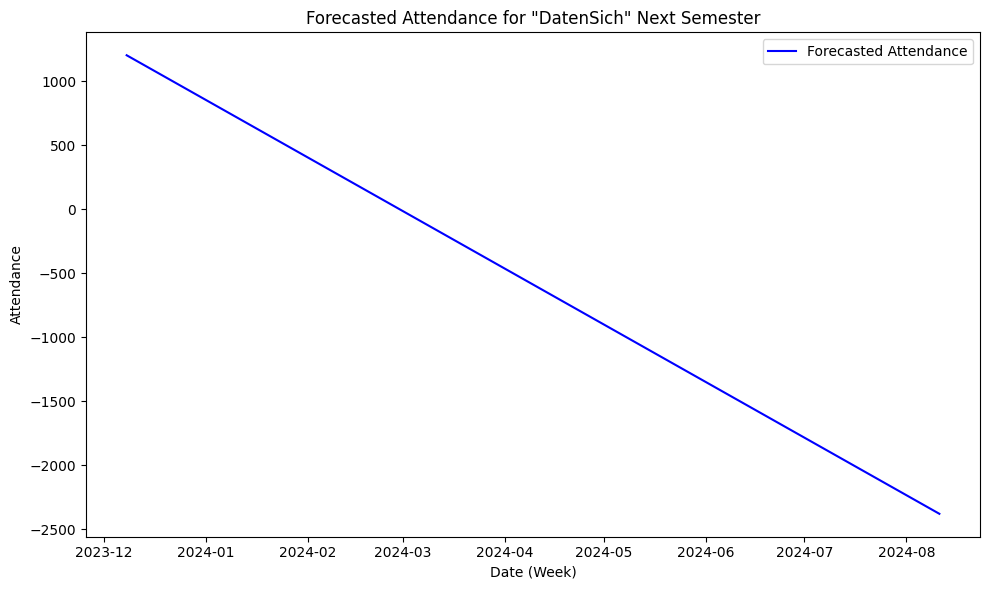

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the weekly attendance data
df_attendance_weekly = pd.read_csv('module_attendance_per_day_week.csv')  # Replace with actual CSV file

# Convert 'day' to datetime format for Prophet
df_attendance_weekly['day'] = pd.to_datetime(df_attendance_weekly['day'])

# Rename the columns for Prophet: 'day' -> 'ds', 'attendance_count' -> 'y'
df_prophet = df_attendance_weekly.rename(columns={'day': 'ds', 'attendance_count': 'y'})

# Fit the model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    # Select data for the specific module
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module', 'week'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks into the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_next_semester.csv", index=False)

# Optionally, plot the results for a specific module
plt.figure(figsize=(10, 6))

# Plot for a specific module (e.g., 'DatenSich')
df_datenbank = df_forecast[df_forecast['module'] == 'DatenSich']
plt.plot(df_datenbank['ds'], df_datenbank['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "DatenSich" Next Semester')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenbank.png")

# Show the plot
plt.show()


Index(['module', 'day', 'week', 'attendance_count'], dtype='object')


23:58:58 - cmdstanpy - INFO - Chain [1] start processing
23:58:58 - cmdstanpy - INFO - Chain [1] done processing
23:58:59 - cmdstanpy - INFO - Chain [1] start processing
23:58:59 - cmdstanpy - INFO - Chain [1] done processing
23:58:59 - cmdstanpy - INFO - Chain [1] start processing
23:58:59 - cmdstanpy - INFO - Chain [1] done processing
23:59:00 - cmdstanpy - INFO - Chain [1] start processing
23:59:00 - cmdstanpy - INFO - Chain [1] done processing
23:59:00 - cmdstanpy - INFO - Chain [1] start processing
23:59:00 - cmdstanpy - INFO - Chain [1] done processing


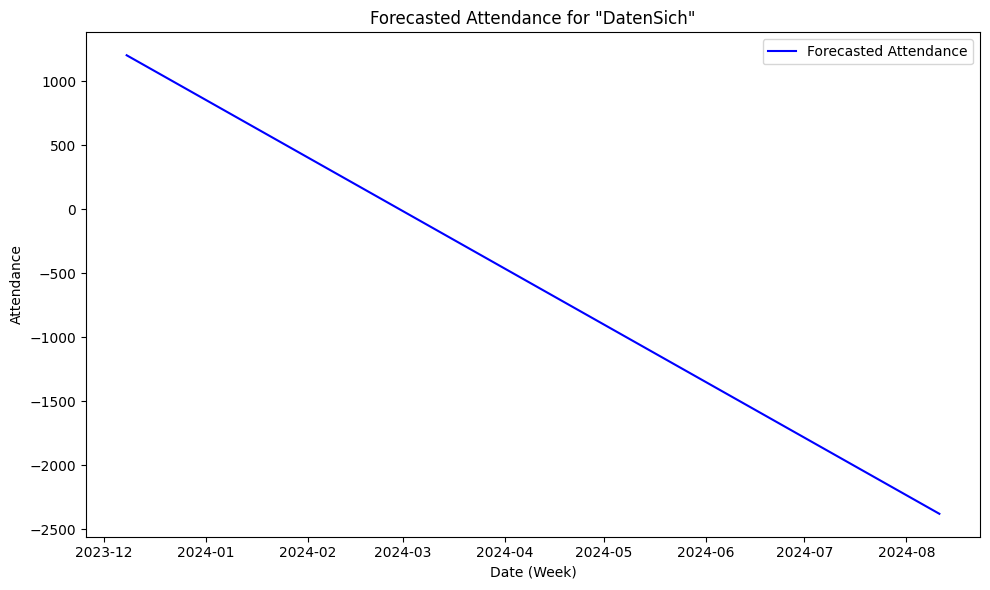

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df_attendance_weekly = pd.read_csv('module_attendance_per_day_week.csv')

# Print the columns to inspect
print(df_attendance_weekly.columns)

# Convert 'day' (or replace with correct date column) to datetime
df_attendance_weekly['day'] = pd.to_datetime(df_attendance_weekly['day'])

# Rename the columns for Prophet: 'day' -> 'ds', 'attendance_count' -> 'y'
df_prophet = df_attendance_weekly.rename(columns={'day': 'ds', 'attendance_count': 'y'})

# Fit the Prophet model for each module
modules = df_prophet['module'].unique()
forecast_results = []

for module in modules:
    # Select data for the specific module
    df_module = df_prophet[df_prophet['module'] == module].drop(columns=['module', 'week'])
    
    # Initialize Prophet model
    model = Prophet()
    
    # Fit the model
    model.fit(df_module)
    
    # Create a dataframe to hold future predictions (let's predict for 18 weeks into the next semester)
    future = model.make_future_dataframe(periods=18, freq='W')  # 18 weeks into the future
    
    # Forecast the attendance
    forecast = model.predict(future)
    
    # Store the results with the module name
    forecast['module'] = module
    forecast_results.append(forecast[['ds', 'yhat', 'module']])

# Concatenate all the forecasts
df_forecast = pd.concat(forecast_results)

# Save the forecast data to a CSV file
df_forecast.to_csv("attendance_forecast_per_module.csv", index=False)

# Optionally, plot the results for one specific module (e.g., 'DatenSich')
plt.figure(figsize=(10, 6))

df_specific_module = df_forecast[df_forecast['module'] == 'DatenSich']  # Replace 'DatenSich' with your desired module
plt.plot(df_specific_module['ds'], df_specific_module['yhat'], label='Forecasted Attendance', color='blue')

plt.xlabel('Date (Week)')
plt.ylabel('Attendance')
plt.title('Forecasted Attendance for "DatenSich"')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("attendance_forecast_datenSich.png")

# Show the plot
plt.show()
